# Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')


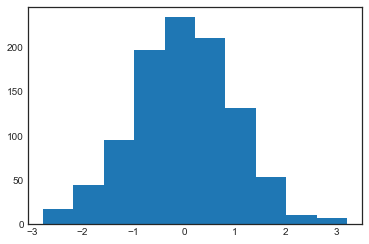

In [13]:
data = np.random.randn(1000)
plt.hist(data);

In [19]:
print('mean:    ',data.mean())
print('std: ',data.std())

mean:     -0.020810905363503315
std:  0.9968137101507077


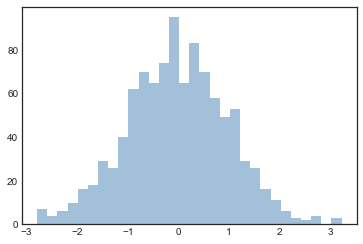

In [20]:
#this can be tuned further
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The alpha value can be useful when comparing several histograms:

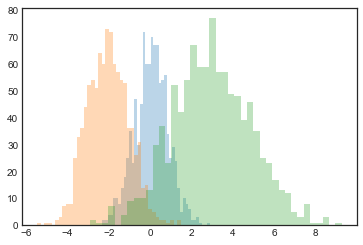

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the `np.histogram()` function is available:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 38 306 493 154   9]


# Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins. 

We'll take a brief look at several ways to do this here. We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### `plt.hist2d`: Two-dimensional histogram



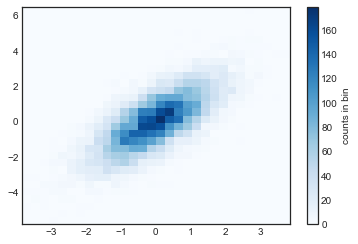

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [22]:
# numpy counterpart
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts)

[[  0.   0.   1.   0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   2.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   1.   1.   1.   3.   0.   0.   1.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  1.   0.   0.   0.   3.   3.   1.   2.   4.   2.   1.   1.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   1.   0.   2.   3.   5.   3.   0.   4.   7.   1.   0.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   0.   0.   2.   0.   5.   5.  11.  11.   6.   7.   4.   2.   2.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.]
 [  0.   1.   1.   0.   0.   2.   9.  17.  17.  11.  13.  

### `plt.hexbin`: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes. 

Another natural shape for such a tesselation is the regular hexagon. 

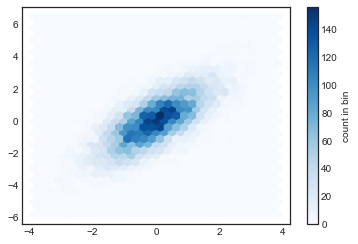

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.)

## Kernel density estimation

Another common method of evaluating densities in multiple dimensions is kernel density estimation (KDE).

KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.

One extremely quick and simple KDE implementation exists in the `scipy.stats` package. Here is a quick example of using the KDE on this data:

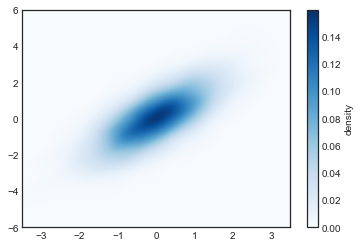

In [10]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues',
          interpolation='bicubic')
cb = plt.colorbar()
cb.set_label("density")

Trade-off of detail and smoothness in KDE.

# Summary

Histograms give us a general idea of the shape on a dataset.

Multiple histograms can be plotted on the same figure to aid comparison.

Two-dimensional histograms follow a similar theory of visualising the shape of a dataset.

Hexagonal visualisation also an option.